# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Lucas Chandra
- **Email:** lucaschandra18@gmail.com
- **ID Dicoding:** lucas_chndra

## Import Semua Packages/Library yang Digunakan

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucascha","key":"6ee5fce662be883e09df2bfb406e4795"}'}

In [3]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
#Download dataset dari Kaggle
!kaggle datasets download -d misrakahmed/vegetable-image-dataset
# Ekstrak file zip
!unzip -q vegetable-image-dataset.zip -d vegetable_dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0


## Data Preparation

### Data Loading

In [19]:
img_size = (64, 64)
batch_size = 64

train_dir = '/content/vegetable_dataset/Vegetable Images/train'
val_dir = '/content/vegetable_dataset/Vegetable Images/validation'
test_dir = '/content/vegetable_dataset/Vegetable Images/test'

### Data Preprocessing

#### Split Dataset

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [21]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

num_classes = len(train_generator.class_indices)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## Modelling

In [22]:
# Bangun Model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,277,007 (4.87 MB)

 Trainable params: 1,277,007 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.2514 - loss: 2.1731

235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 147ms/step - accuracy: 0.2519 - loss: 2.1715 - val_accuracy: 0.5933 - val_loss: 1.2426
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5912 - loss: 1.2067

235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - accuracy: 0.5914 - loss: 1.2063 - val_accuracy: 0.6800 - val_loss: 0.9399
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6936 - loss: 0.9154

235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - accuracy: 0.6937 - loss: 0.9151 - val_accuracy: 0.7647 - val_loss: 0.6710
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7665 - loss: 0.6957

235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - accuracy: 0.7666 - loss: 0.6956 - val_accuracy: 0.8037 - val_loss: 0.6184
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8033 - loss: 0.5974

235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - accuracy: 0.8033 - loss: 0.5973 - val_accuracy: 0.8547 - val_loss: 0.4750
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8392 - loss: 0.4924

235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 144ms/step - accuracy: 0.8392 - loss: 0.4923 - val_accuracy: 0.8760 - val_loss: 0.4071
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8577 - loss: 0.4409

235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - accuracy: 0.8577 - loss: 0.4409 - val_accuracy: 0.9023 - val_loss: 0.3091
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 134ms/step - accuracy: 0.8801 - loss: 0.3709 - val_accuracy: 0.8650 - val_loss: 0.4220
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - accuracy: 0.8878 - loss: 0.3463 - val_accuracy: 0.8537 - val_loss: 0.4618
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9024 - loss: 0.3221

235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9024 - loss: 0.3220 - val_accuracy: 0.9120 - val_loss: 0.3007
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - accuracy: 0.9102 - loss: 0.2803 - val_accuracy: 0.9003 - val_loss: 0.3291
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9214 - loss: 0.2454

235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 136ms/step - accuracy: 0.9214 - loss: 0.2454 - val_accuracy: 0.9220 - val_loss: 0.2688
Epoch 13/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9201 - loss: 0.2537

235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 143ms/step - accuracy: 0.9201 - loss: 0.2536 - val_accuracy: 0.9520 - val_loss: 0.1650
Epoch 14/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - accuracy: 0.9239 - loss: 0.2410 - val_accuracy: 0.9403 - val_loss: 0.1966
Epoch 15/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9268 - loss: 0.2165

235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - accuracy: 0.9268 - loss: 0.2165 - val_accuracy: 0.9567 - val_loss: 0.1467
Epoch 16/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - accuracy: 0.9356 - loss: 0.1902 - val_accuracy: 0.9540 - val_loss: 0.1599
Epoch 17/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - accuracy: 0.9365 - loss: 0.1891 - val_accuracy: 0.9333 - val_loss: 0.2266
Epoch 18/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 142ms/step - accuracy: 0.9417 - loss: 0.1637 - val_accuracy: 0.9460 - val_loss: 0.1904
Epoch 19/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - accuracy: 0.9428 - loss: 0.1863 - val_accuracy: 0.9270 - val_loss: 0.2744
Epoch 20/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 136ms/step - accuracy: 0.9473 - loss: 0.1610 - val_accuracy: 0.9400 - val_loss: 0.2379


## Evaluasi dan Visualisasi

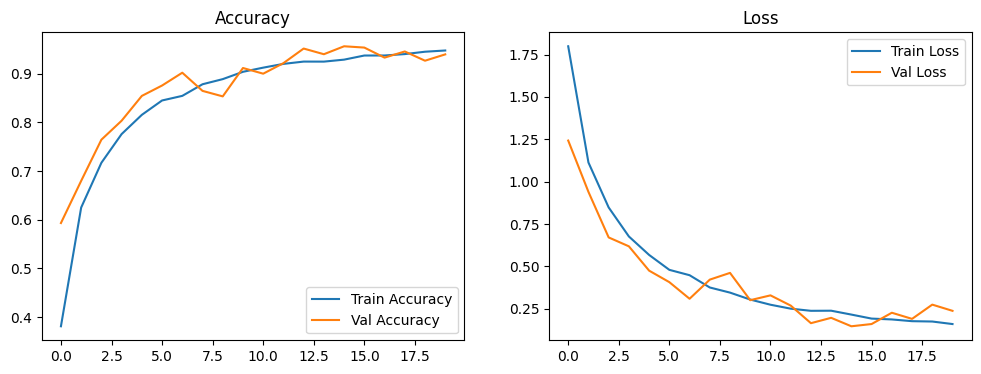

In [25]:
# Visualisasi Akurasi & Loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()

In [27]:
# Evaluasi Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9643 - loss: 0.1187
Test Accuracy: 0.9593


In [28]:
# Klasifikasi dan Confusion Matrix
y_pred = model.predict(test_generator)
y_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_classes, target_names=test_generator.class_indices.keys()))

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step
              precision    recall  f1-score   support

        Bean       0.86      0.98      0.92       200
Bitter_Gourd       0.96      0.95      0.96       200
Bottle_Gourd       0.99      1.00      1.00       200
     Brinjal       0.97      0.95      0.96       200
    Broccoli       0.90      0.94      0.92       200
     Cabbage       0.99      0.89      0.94       200
    Capsicum       0.99      0.99      0.99       200
      Carrot       1.00      0.99      1.00       200
 Cauliflower       0.93      0.97      0.95       200
    Cucumber       0.98      0.88      0.93       200
      Papaya       0.97      0.97      0.97       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       0.98      0.91      0.94       200
      Radish       1.00      0.98      0.99       200
      Tomato       0.89      0.97      0.93       200

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0

## Konversi Model

In [30]:
# Simpan Model
model.export('vegetable_model')

Saved artifact at 'vegetable_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  139923223542864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139923223543440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139923223543632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139922605983120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139922605982544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139922605983888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139922605981968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139922605984656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139922605984080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139922605985424: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [31]:
# Simpan sebagai TF-Lite
tflite_converter = tf.lite.TFLiteConverter.from_saved_model('vegetable_model')
tflite_model = tflite_converter.convert()
with open('vegetable_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [32]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [33]:
# Simpan model ke format TFJS
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model vegetable_model tfjs_model

2025-04-21 16:52:52.062696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745254372.083147   16366 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745254372.089219   16366 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-04-21 16:52:58.203448: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1745254378.203708   16366 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [36]:
# Download Folder vegetable_model (save model)
!zip -r vegetable_model.zip vegetable_model
files.download('vegetable_model.zip')

# Download File TF-Lite
files.download('vegetable_model.tflite')

# Download Folder tfjs_model
!zip -r tfjs_model.zip tfjs_model
files.download('tfjs_model.zip')

  adding: vegetable_model/ (stored 0%)
  adding: vegetable_model/saved_model.pb (deflated 85%)
  adding: vegetable_model/fingerprint.pb (stored 0%)
  adding: vegetable_model/variables/ (stored 0%)
  adding: vegetable_model/variables/variables.index (deflated 62%)
  adding: vegetable_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: vegetable_model/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard2of2.bin (deflated 7%)
  adding: tfjs_model/group1-shard1of2.bin (deflated 7%)
  adding: tfjs_model/model.json (deflated 88%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
Predicted class: Tomato


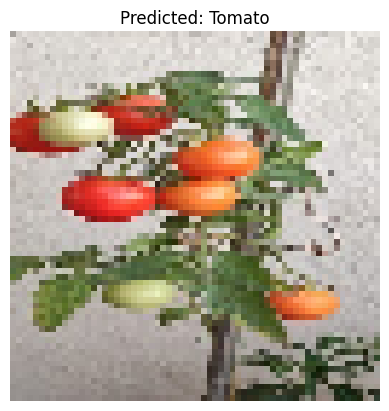

In [37]:
# Prediksi Satu Gambar
from tensorflow.keras.preprocessing import image
img_path = '/content/vegetable_dataset/Vegetable Images/test/Tomato/1020.jpg'

img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()